In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("C:\\Users\\rbesli\\Desktop\\ders11\\engine_data.csv")

In [24]:
numeric_cols = ["Engine rpm", "Lub oil pressure", "Fuel pressure", "Coolant pressure","lub oil temp","Coolant temp","Engine Condition"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors= 'coerce') 
    #tüm sayısal sütunları numeric şekilde alacak. Eksik değerleri de alacak
    #eksik değerleri dolduralım aşağıda : 
    if df[col].isna().any():
        med = df[col].median()
        df[col].fillna(med, inplace=True)

mins = df[numeric_cols].min(axis=0)
maxs = df[numeric_cols].max(axis=0)

def min_max_scale(X: pd.DataFrame, mins: pd.Series, maxs: pd.Series, feature_range = (0,1)) -> pd.DataFrame:
    #min sıfır max bir olacak şekilde ayarlamış olduk
    X = X.copy().astype(float)
    min_range, max_range = feature_range
    denom = (maxs-mins).replace(0, 1.0)
    X_scaled = (X - mins) / denom
    return X_scaled * (max_range - min_range) + min_range

print(min_max_scale(df,mins, maxs))
    

       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0        0.293388          0.342901       0.557732          0.424891   
1        0.374197          0.404592       0.766055          0.329322   
2        0.210744          0.407365       0.309909          0.142036   
3        0.189164          0.510102       0.922965          0.498256   
4        0.256198          0.780693       0.744527          0.274179   
...           ...               ...            ...               ...   
19530    0.386134          0.566484       0.235540          0.581069   
19531    0.290634          0.662933       0.514002          0.827205   
19532    0.286042          0.367653       0.232986          0.254292   
19533    0.291552          0.425599       0.392173          0.163088   
19534    0.203398          0.519384       0.187332          0.272359   

       lub oil temp  Coolant temp  Engine Condition  
0          0.702246      0.149109               1.0  
1          0.346077      0.

**Standarizasyon**

In [29]:
import time
import sys
import matplotlib.pyplot as plt

In [32]:
def standard_scale (X):
    X = X.astype(float)
    mean = X.mean(axis=0)
    std = X.std(axis=0, ddof =0).replace(0, 1.0)
    #ddof = Delta Degrees of Freedom -> 
    # istatistiksel hesaplamalarda kullanılan bir serbestlik derecesi düzeltme parametresidir.
    return ( X - mean) / std

#Ölçeklenmiş Veri Setleri

X = df[numeric_cols]

t0 = time.time()
X_minmax = min_max_scale(X, X.min(), X.max())
t1 = time.time()
X_standard = standard_scale(X)
t2 = time.time()

print("MinMax Scale İşlem Süresi(s): ", round(t1-t0, 6))
print("Standardizasyon işlem süresi (s): ", round(t2-t1))


#Byte cinsinden işlemlerin bellek kullanımı

print("Bellek kullanımı (byte): ", )
print("Orijinal : ", sys.getsizeof(X.values))
print("Min-Max : ", sys.getsizeof(X_minmax.values))
print("Standardizasyon : ", sys.getsizeof(X_standard.values))

MinMax Scale İşlem Süresi(s):  0.010644
Standardizasyon işlem süresi (s):  0
Bellek kullanımı (byte): 
Orijinal :  128
Min-Max :  128
Standardizasyon :  128


C:\Users\rbesli\AppData\Local\Temp\ipykernel_10224\656376699.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X[col] for col in numeric_cols], labels= numeric_cols)


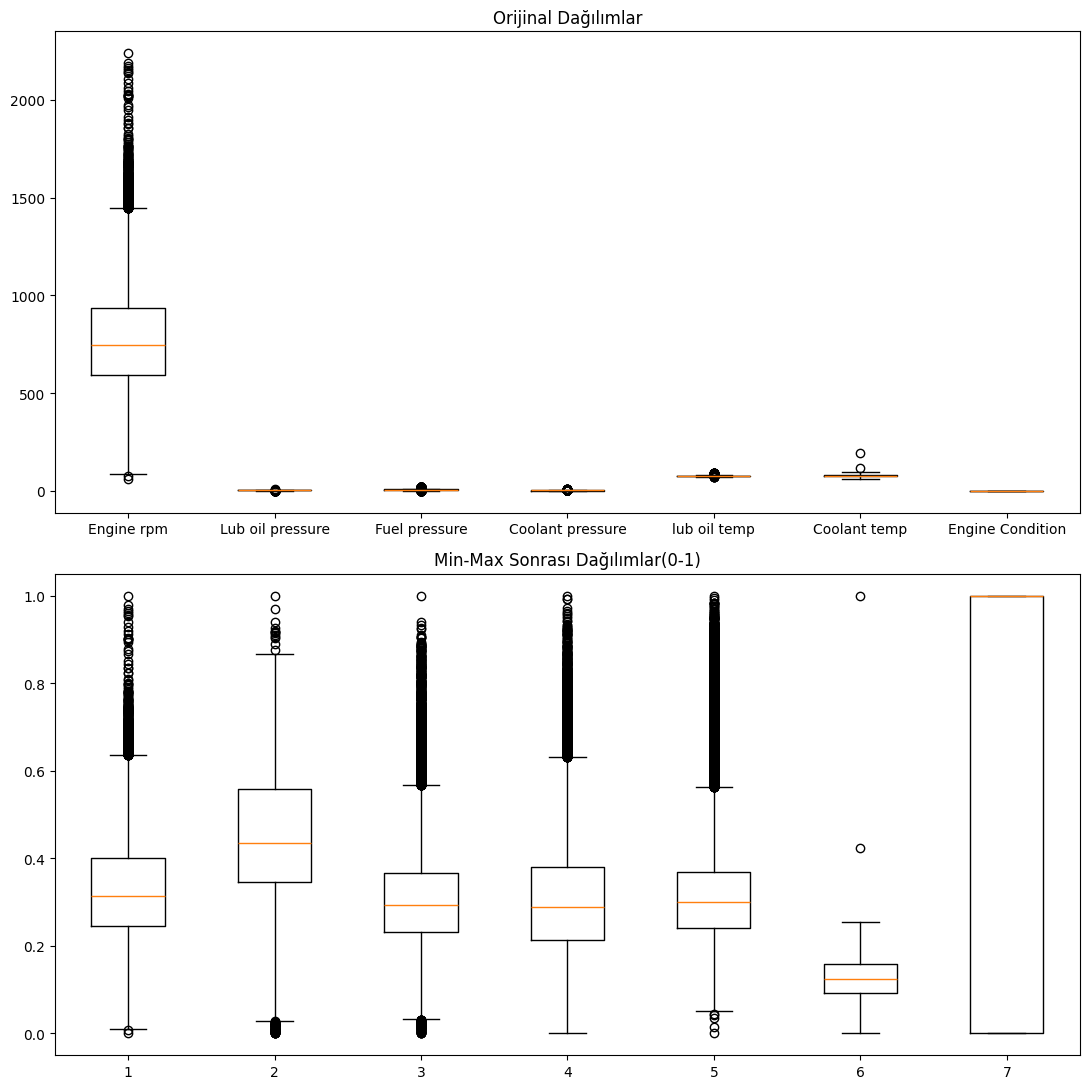

In [46]:
plt.figure(figsize=(11,11))
plt.subplot(2,1,1)
plt.boxplot([X[col] for col in numeric_cols], labels= numeric_cols)
plt.title("Orijinal Dağılımlar")

plt.subplot(2,1,2)
plt.boxplot([X_minmax[col] for col in numeric_cols], label=numeric_cols)
plt.title("Min-Max Sonrası Dağılımlar(0-1)")

plt.tight_layout()
plt.show()

RPM'in Histogram Dağılımı

Text(0, 0.5, 'Frekans')

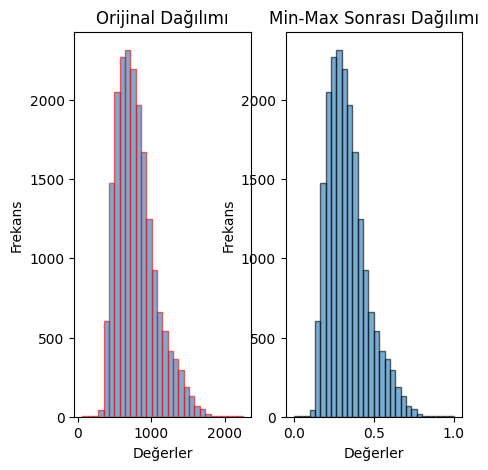

In [75]:
plt.figure(figsize=(5,5))

plt.subplot(1, 2, 1)
plt.hist(X["Engine rpm"], bins=30, edgecolor='red', alpha=0.6)
plt.title('Orijinal Dağılımı')
plt.xlabel('Değerler')
plt.ylabel('Frekans')


plt.subplot(1, 2, 2)
plt.hist(X_minmax["Engine rpm"], bins=30, edgecolor='black', alpha=0.6)
plt.title('Min-Max Sonrası Dağılımı')
plt.xlabel('Değerler')
plt.ylabel('Frekans')




In [76]:
import seaborn as sns

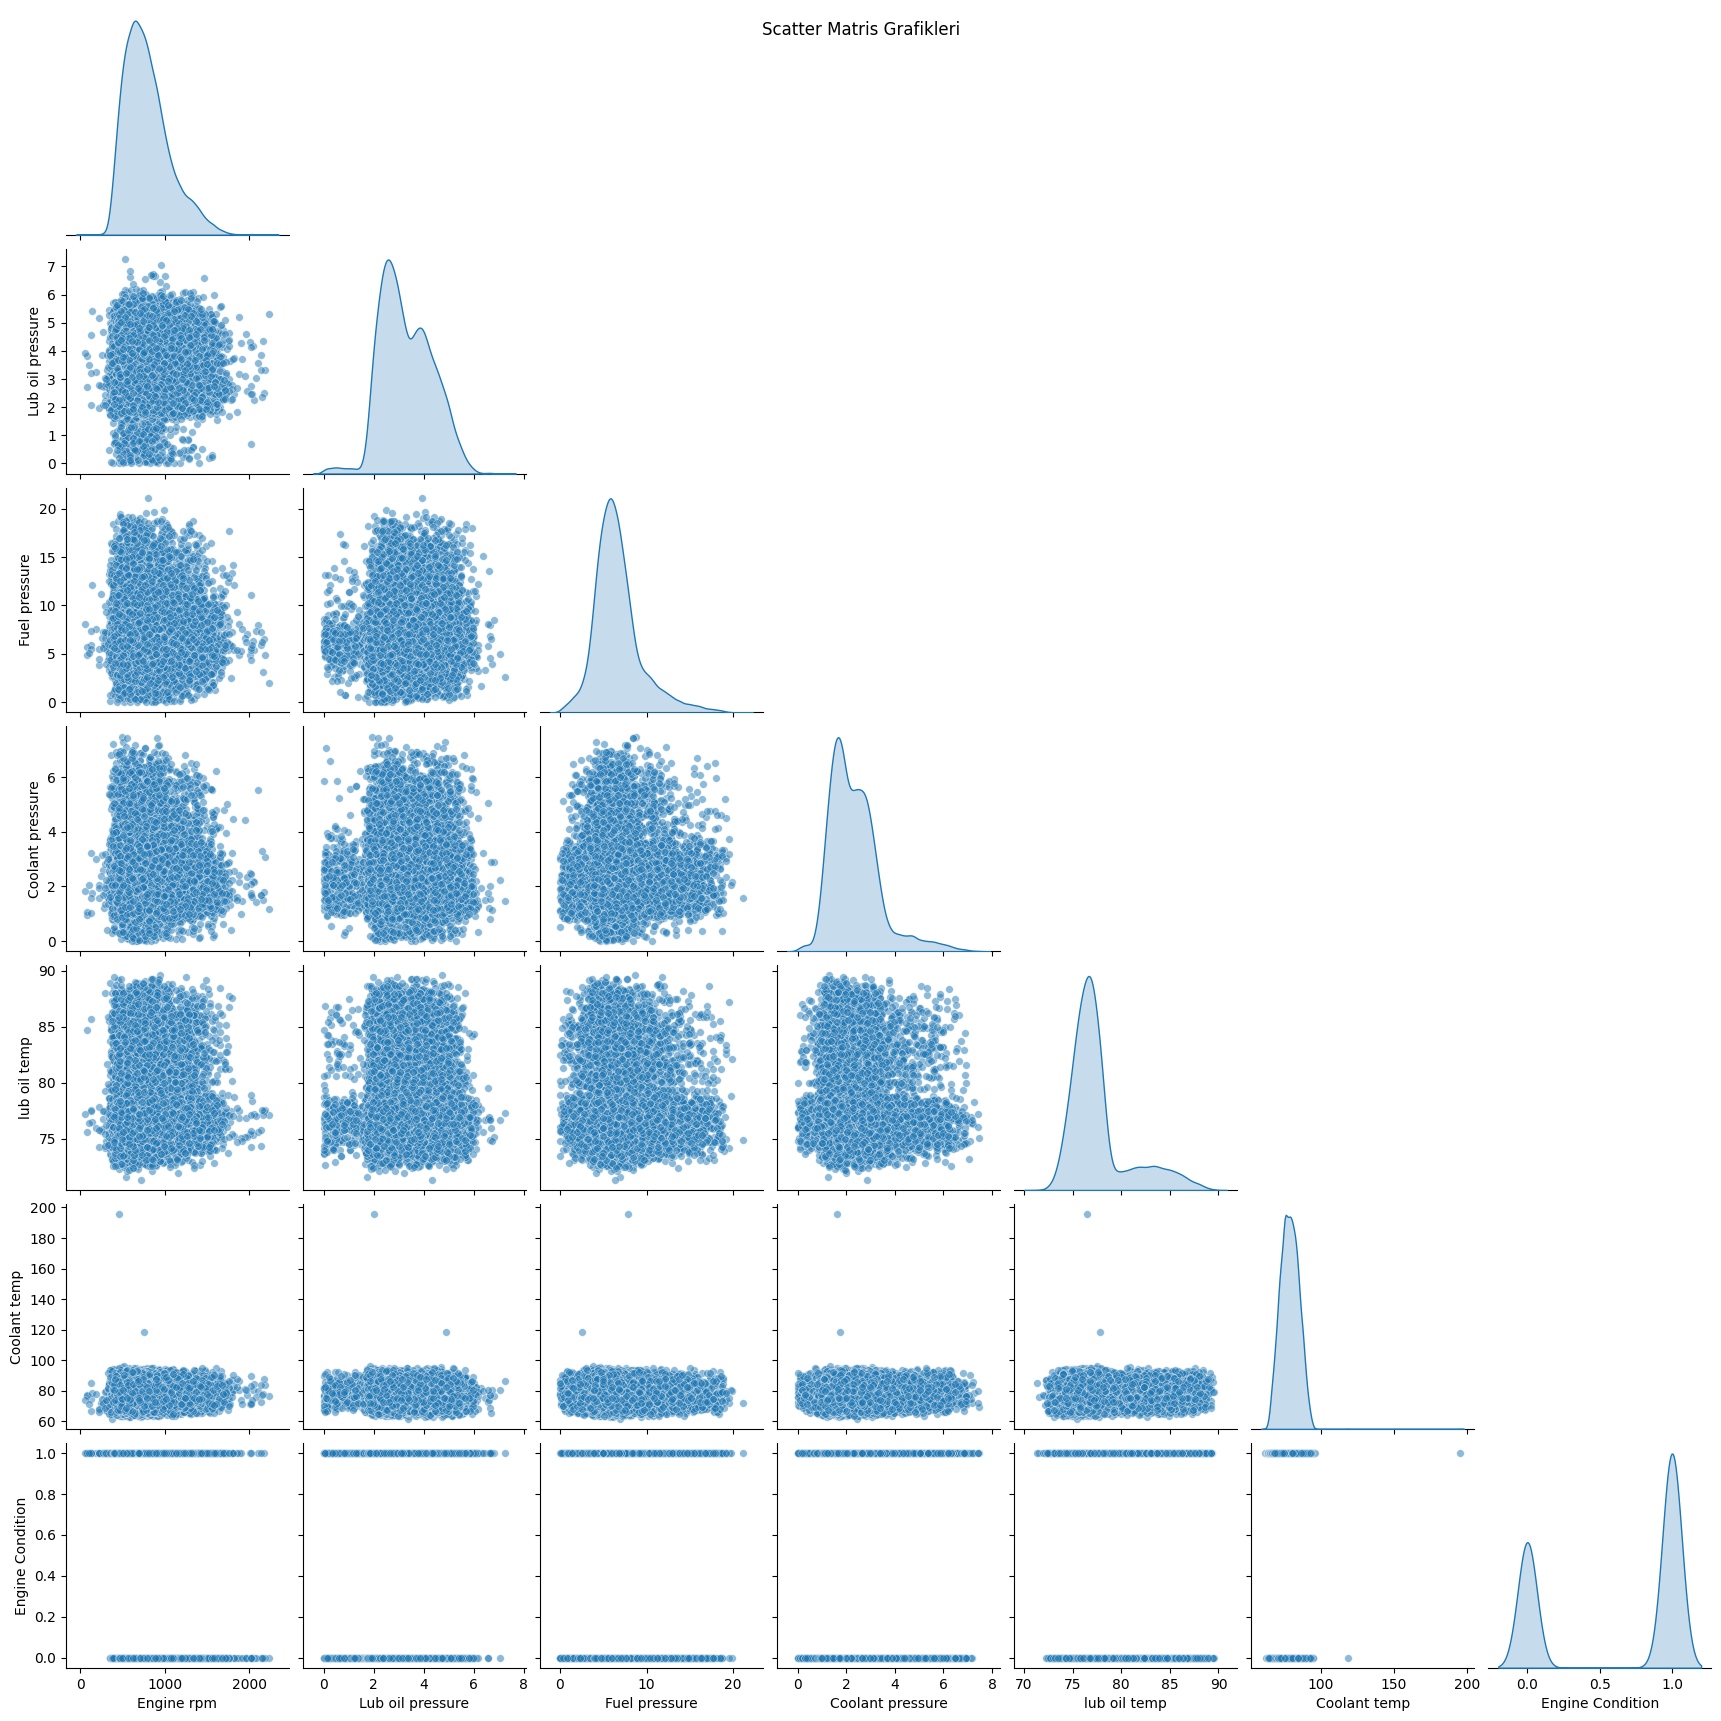

In [82]:
sns.pairplot(df[numeric_cols], diag_kind="kde", corner=True, plot_kws={"alpha":0.5, "s":30})
plt.suptitle("Scatter Matris Grafikleri")
plt.show()